In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import warnings
warnings.filterwarnings("ignore")

**1.1    Data exploration with PCA**
1.  Import and view the data.  How many columns do you have?  Which columns will you use in your PCA ?

In [2]:
df = pd.read_csv('/content/Pottery.csv')

In [3]:
df.head()

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [4]:
df.shape

(26, 7)

**Answer :** 
We have 7 columns in our dataset out of which we will only use six namely:

1.Site

2.Al

3.Fe

4.Mg

5.Ca

6.Na 

In [5]:
#checking null values if any
df.isnull().sum()

Unnamed: 0    0
Site          0
Al            0
Fe            0
Mg            0
Ca            0
Na            0
dtype: int64

2.  Pre-process the data and perform PCA with 3 PCs.

In [6]:
#dropping unwanted columns
df.drop(labels = ['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()

,Site,Al,Fe,Mg,Ca,Na
0,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [8]:
df.set_index('Site', inplace=True)

In [9]:
#Standardising dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.03145568,  1.07166989,  0.54199637,  0.03487194,  2.64999905],
       [-0.23591756,  1.1055258 ,  0.13495926, -0.26735151,  0.08698028],
       [ 0.03669829,  1.10975779,  0.3454957 , -0.16661036,  0.31312899],
       [-1.01968814,  0.80505457,  1.1689271 ,  0.13561308, -0.13916844],
       [-0.23591756,  1.09706182,  1.02856948,  0.53857767,  0.31312899],
       [-1.22415003,  0.75850268,  0.15367361,  0.23635423,  0.4638948 ],
       [-1.49676588, -0.08789516,  0.52328202,  0.53857767,  0.16236318],
       [-0.98561116,  0.5553672 ,  1.29524897,  0.33709538,  0.01159737],
       [-1.15599607,  0.43263951,  0.6449253 ,  1.44524799,  1.06695804],
       [-0.37222549,  1.03781397,  1.91282252,  1.34450685,  0.31312899],
       [-0.71299531,  0.70348682,  1.19232004,  0.74005996,  2.87614776],
       [-0.47445644,  0.91931828,  1.10810547,  1.64673029,  0.61466061],
       [-0.61076436,  0.94047822,  0.61217519,  0.53857767,  0.4638948 ],
       [-0.67891832,  0.83467849,  0.3

In [10]:
df_scaled.mean(axis = 0)

array([5.12410627e-17, 1.70803542e-17, 4.27008856e-17, 3.84307970e-17,
       5.97812398e-17])

In [11]:
df_scaled.std(axis = 0)

array([1., 1., 1., 1., 1.])

In [12]:
df.head()

,Al,Fe,Mg,Ca,Na
Site,,,,,
Llanedyrn,14.4,7.00,4.30,0.15,0.51
Llanedyrn,13.8,7.08,3.43,0.12,0.17
Llanedyrn,14.6,7.09,3.88,0.13,0.20
Llanedyrn,11.5,6.37,5.64,0.16,0.14
Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [13]:
#perfroming PCA with 3 components
pca = PCA(n_components=3, svd_solver='full')

In [14]:
pca_scores = pca.fit_transform(df_scaled)

In [15]:
pca_scores.shape

(26, 3)

In [16]:
scores_pd = pd.DataFrame(data = pca_scores,columns = ['PC1', 'PC2', 'PC3'],index = df.index)

In [17]:
scores_pd

,PC1,PC2,PC3
Site,,,
Llanedyrn,-1.778026,2.289445,-0.075289
Llanedyrn,-0.611193,0.122065,-0.499044
Llanedyrn,-0.722428,0.370209,-0.207550
Llanedyrn,-1.417696,-0.555600,-0.557590
Llanedyrn,-1.486801,-0.004081,0.195248
Llanedyrn,-1.259044,-0.092347,-0.783259
Llanedyrn,-1.180703,-0.607921,-0.575010
Llanedyrn,-1.490385,-0.498745,-0.336582
Llanedyrn,-2.076010,0.000500,0.220714


In [18]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = df.columns)

In [19]:
loadings_pd

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


3.  Plot the cumulative explained variance graph.  What percent of the variance do the first 2 and 3 components describe?

In [20]:
pca.explained_variance_

array([4.03290887, 0.63316224, 0.25395987])

In [21]:
pca.explained_variance_ratio_*100

array([77.55593977, 12.17619687,  4.88384364])

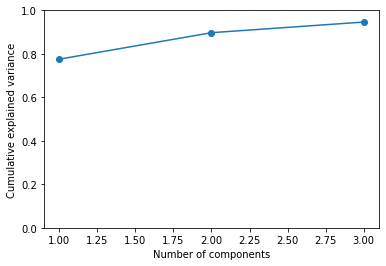

In [22]:
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.ylim(0,1)
plt.show()

The first two Principal components describe 90 percent of the variance while the first three principal components describe about 95 percent of the variance.

4.  Plot the scores-loadings graph for PC1-PC2.  Visualize the different sites with a different colour or symbol.

In [23]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        if label == 'AshleyRails':
          plt.text(x, y, 'AshRl', ha='center', size=10, color = 'green')
        elif label == 'Caldicot':
          plt.text(x, y, 'Cald', ha='center', size=10, color = 'orange')
        elif label == 'IsleThorns':
          plt.text(x, y, 'IsTh', ha='center', size=10, color = 'red')
        else:
          plt.text(x, y, 'Llan', ha='center', size=10, color = 'blue')
            
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'black',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'black', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

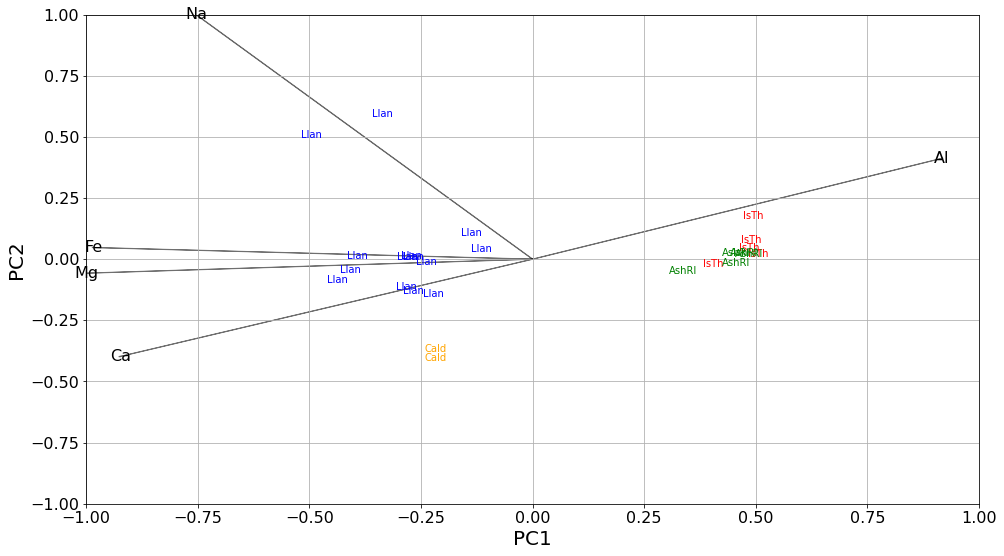

In [24]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(pca_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

5.  How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?

**ANSWER: As is evident from the graph, the sites Ashley Rail and Isle Thorns have the same raw materials thus it makes sense to use raw material from these sites to manufacture product B** 

6.  Is the raw material from Caldicot a good replacement for Llanedyrn?  Yes or no and why?

**Answer:
Although the graph shows similar characteristics of both the Llanedyrn and Caldicot, the raw materials from Caldicot does not seem like the best replacement for Llandyrn. Samples from Caldicot does not contain the required concentration for Llandryn. For example Samples from Na have very high concentration while caldicot has lower amounts of Na which will affect the production of the product**

7.  What  are  the  biggest  differences  in  the  two  big  clusters?   How  are  the  two  samples from the candidate Caldicot different than the Llanedyrn samples?

**Answer: 
The samples from cluster IsleThorns and AshleyRails supply similar raw materials with almost similar concentration levels. The raw materials from the Llandryn and Caldicot cluster has significant difference in the concentration levels. Caldicot has lower concentration of Na while Llandryn has high concentration of Na.**


8.  Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below.

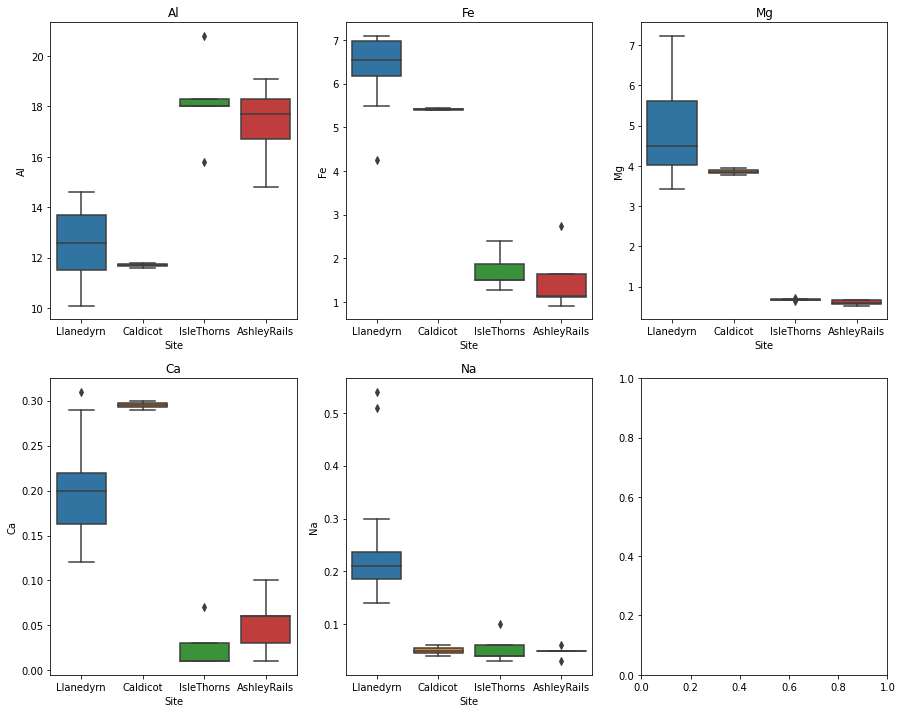

In [25]:
fig, axs = plt.subplots(2, 3,figsize=(15,12))   
sns.boxplot(x=df.index, y=df['Al'], data=df,ax=axs[0,0]).set(title='Al')
sns.boxplot(x=df.index, y='Fe', data=df,ax=axs[0,1]).set(title='Fe') 
sns.boxplot(x=df.index, y='Mg', data=df,ax=axs[0,2]).set(title='Mg') 
sns.boxplot(x=df.index, y='Ca', data=df,ax=axs[1,0]).set(title='Ca') 
sns.boxplot(x=df.index, y='Na', data=df,ax=axs[1,1]).set(title='Na') 
plt.show()